In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<h4>Problem3(a)</h4>

In [2]:
count=0
adult_data_df=pd.read_csv('E:/MyCourses/CSC478ProgrammingMachineLearning/homework2/adult-modified.csv', na_values=["?"])
adult_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9802 non-null   float64
 1   workclass       9412 non-null   object 
 2   education       10000 non-null  int64  
 3   marital-status  10000 non-null  object 
 4   race            10000 non-null  object 
 5   sex             10000 non-null  object 
 6   hours-per-week  10000 non-null  int64  
 7   income          10000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


In [3]:
adult_data_df=adult_data_df.drop(adult_data_df[adult_data_df.workclass.isnull()].index, axis=0)

In [4]:
age_mean = adult_data_df.age.mean()
age_mean

38.36463189851458

In [5]:
adult_data_df.age.fillna(age_mean, axis=0, inplace=True)

In [6]:
adult_data_df.describe()

age    education  hours-per-week
count  9412.000000  9412.000000     9412.000000
mean     38.364632    10.125266       41.080217
std      12.962034     2.542118       11.884590
min      17.000000     1.000000        1.000000
25%      28.000000     9.000000       40.000000
50%      37.000000    10.000000       40.000000
75%      47.000000    13.000000       45.000000
max      90.000000    16.000000       99.000000

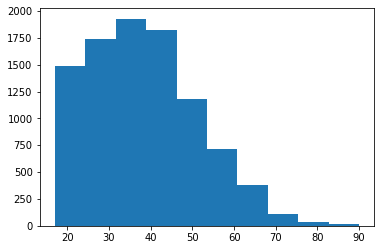

In [7]:
plt.hist(adult_data_df.age)
plt.show()

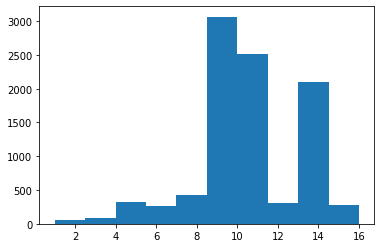

In [8]:
plt.hist(adult_data_df.education)
plt.show()

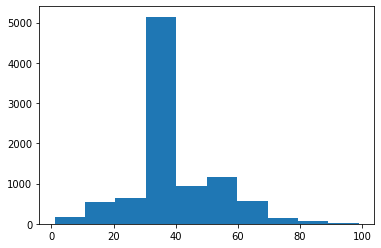

In [9]:
plt.hist(adult_data_df["hours-per-week"])
plt.show()

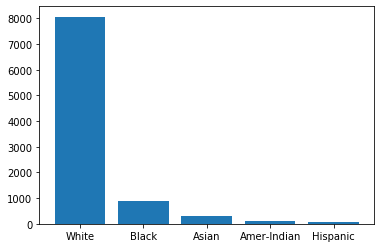

In [10]:
race_counts=adult_data_df.race.value_counts()
plt.bar(race_counts.index, race_counts)
plt.show()

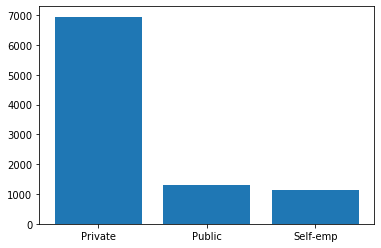

In [11]:
workclass_counts=adult_data_df.workclass.value_counts()
plt.bar(workclass_counts.index, workclass_counts)
plt.show()

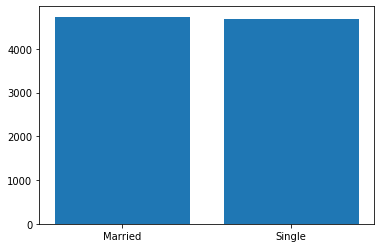

In [12]:
marital_status_counts=adult_data_df['marital-status'].value_counts()
plt.bar(marital_status_counts.index, marital_status_counts)
plt.show()

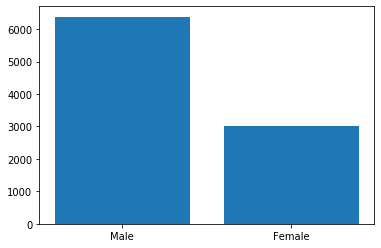

In [13]:
sex_counts=adult_data_df['sex'].value_counts()
plt.bar(sex_counts.index, sex_counts)
plt.show()

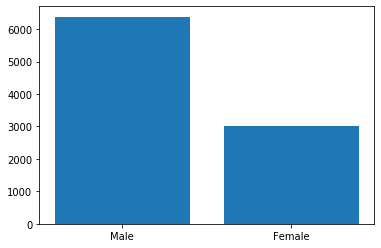

In [14]:
income_counts=adult_data_df['sex'].value_counts()
plt.bar(income_counts.index, income_counts)
plt.show()

In [15]:
er=pd.crosstab(adult_data_df.education,adult_data_df.race)
er

race       Amer-Indian  Asian  Black  Hispanic  White
education                                            
1                    0      0      1         0     11
2                    0      1      4         3     38
3                    0      4      5         1     71
4                    5      5     14         6    150
5                    0      3     19         2    118
6                    8      3     30         4    223
7                    4      6     49         4    261
8                    0      2     17         3     78
9                   35     67    350        23   2590
10                  26     64    206        11   1818
11                   5     10     33         4    337
12                   4      5     33         3    259
13                   5     75    102         8   1387
14                   0     27     20         1    467
15                   0     11      5         2    153
16                   0      8      4         0    101

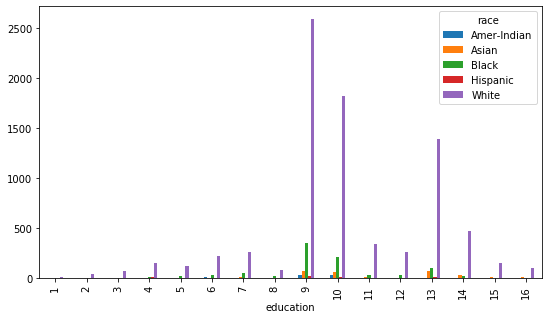

In [16]:
plt.show(er.plot(kind='bar',figsize=(9,5)))

In [17]:
wi=pd.crosstab(adult_data_df.workclass,adult_data_df.income)
wi

income     <=50K  >50K
workclass             
Private     5443  1504
Public       925   392
Self-emp     725   423

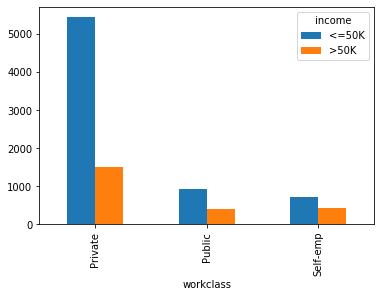

In [18]:
plt.show(wi.plot(kind='bar'))

In [19]:
wr=pd.crosstab(adult_data_df.workclass,adult_data_df.race)
wr

race       Amer-Indian  Asian  Black  Hispanic  White
workclass                                            
Private             65    204    664        64   5950
Public              20     48    192         5   1052
Self-emp             7     39     36         6   1060

In [20]:
ri=pd.crosstab(adult_data_df.race,adult_data_df.income)
ri

income       <=50K  >50K
race                    
Amer-Indian     83     9
Asian          224    67
Black          773   119
Hispanic        69     6
White         5944  2118

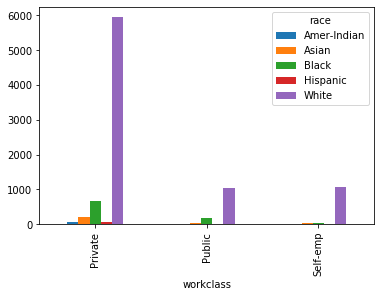

In [21]:
plt.show(wr.plot(kind='bar'))

In [22]:
lowincome_race_pct=ri['<=50K']/ri.sum(axis=1)
lowincome_race_pct

race
Amer-Indian    0.902174
Asian          0.769759
Black          0.866592
Hispanic       0.920000
White          0.737286
dtype: float64

In [23]:
lowincome_workclass_pct=wi['<=50K']/wi.sum(axis=1)
lowincome_workclass_pct

workclass
Private     0.783504
Public      0.702354
Self-emp    0.631533
dtype: float64

<h4>Problem3(b)</h4>

In [24]:
data_matrix=pd.get_dummies(adult_data_df)
data_matrix

age  education  hours-per-week  workclass_Private  \
0     39.000000         13              40                  0   
1     50.000000         13              13                  0   
2     38.000000          9              40                  1   
3     53.000000          7              40                  1   
4     28.000000         13              40                  1   
...         ...        ...             ...                ...   
9995  38.000000         10              60                  1   
9996  25.000000          9               8                  1   
9997  21.000000         10              40                  1   
9998  38.364632          2              53                  1   
9999  39.000000         10              40                  1   

      workclass_Public  workclass_Self-emp  marital-status_Married  \
0                    1                   0                       0   
1                    0                   1                       1   
2                    0                   0                       0   
3                    0                   0                       1   
4                    0                   0                       1   
...                ...                 ...                     ...   
9995                 0                   0                       1   
9996                 0                   0                       0   
9997                 0                   0                       0   
9998                 0                   0                       1   
9999                 0                   0                       0   

      marital-status_Single  race_Amer-Indian  race_Asian  race_Black  \
0                         1                 0           0           0   
1                         0                 0           0           0   
2                         1                 0           0           0   
3                         0                 0           0           1   
4                         0                 0           0           1   
...                     ...               ...         ...         ...   
9995                      0                 0           0           0   
9996                      1                 0           0           0   
9997                      1                 0           0           1   
9998                      0                 0           0           0   
9999                      1                 0           0           0   

      race_Hispanic  race_White  sex_Female  sex_Male  income_<=50K  \
0                 0           1           0         1             1   
1                 0           1           0         1             1   
2                 0           1           0         1             1   
3                 0           0           0         1             1   
4                 0           0           1         0             1   
...             ...         ...         ...       ...           ...   
9995              0           1           0         1             0   
9996              0           1           1         0             1   
9997              0           0           0         1             1   
9998              0           1           0         1             1   
9999              0           1           1         0             1   

      income_>50K  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
9995            1  
9996            0  
9997            0  
9998            0  
9999            0  

[9412 rows x 17 columns]

In [25]:
data_target=data_matrix["income_>50K"]
data_target

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: income_>50K, Length: 9412, dtype: uint8

In [26]:
data_matrix=data_matrix.drop(['income_<=50K','income_>50K'],axis=1)
data_matrix

age  education  hours-per-week  workclass_Private  \
0     39.000000         13              40                  0   
1     50.000000         13              13                  0   
2     38.000000          9              40                  1   
3     53.000000          7              40                  1   
4     28.000000         13              40                  1   
...         ...        ...             ...                ...   
9995  38.000000         10              60                  1   
9996  25.000000          9               8                  1   
9997  21.000000         10              40                  1   
9998  38.364632          2              53                  1   
9999  39.000000         10              40                  1   

      workclass_Public  workclass_Self-emp  marital-status_Married  \
0                    1                   0                       0   
1                    0                   1                       1   
2                    0                   0                       0   
3                    0                   0                       1   
4                    0                   0                       1   
...                ...                 ...                     ...   
9995                 0                   0                       1   
9996                 0                   0                       0   
9997                 0                   0                       0   
9998                 0                   0                       1   
9999                 0                   0                       0   

      marital-status_Single  race_Amer-Indian  race_Asian  race_Black  \
0                         1                 0           0           0   
1                         0                 0           0           0   
2                         1                 0           0           0   
3                         0                 0           0           1   
4                         0                 0           0           1   
...                     ...               ...         ...         ...   
9995                      0                 0           0           0   
9996                      1                 0           0           0   
9997                      1                 0           0           1   
9998                      0                 0           0           0   
9999                      1                 0           0           0   

      race_Hispanic  race_White  sex_Female  sex_Male  
0                 0           1           0         1  
1                 0           1           0         1  
2                 0           1           0         1  
3                 0           0           0         1  
4                 0           0           1         0  
...             ...         ...         ...       ...  
9995              0           1           0         1  
9996              0           1           1         0  
9997              0           0           0         1  
9998              0           1           0         1  
9999              0           1           1         0  

[9412 rows x 15 columns]

In [27]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler().fit(data_matrix)

data_norm = min_max_scaler.transform(data_matrix)
data_norm

array([[0.30136986, 0.8       , 0.39795918, ..., 1.        , 0.        ,
        1.        ],
       [0.45205479, 0.8       , 0.12244898, ..., 1.        , 0.        ,
        1.        ],
       [0.28767123, 0.53333333, 0.39795918, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.05479452, 0.6       , 0.39795918, ..., 0.        , 0.        ,
        1.        ],
       [0.29266619, 0.06666667, 0.53061224, ..., 1.        , 0.        ,
        1.        ],
       [0.30136986, 0.6       , 0.39795918, ..., 1.        , 1.        ,
        0.        ]])

In [28]:
from sklearn.model_selection import train_test_split

train, test, target_train, target_test = train_test_split(data_norm, data_target, test_size=0.2, random_state=33)
target_test

8419    0
2629    0
2523    0
7143    1
5902    0
       ..
6664    1
4843    0
4306    1
3361    0
6547    1
Name: income_>50K, Length: 1883, dtype: uint8

In [29]:
from sklearn import tree, naive_bayes
from sklearn.model_selection import cross_val_score

In [30]:
#naive_bayes
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(train, target_train)
nbpreds_test = nbclf.predict(test)
print(nbpreds_test)

[1 1 0 ... 1 0 1]


In [31]:
cv_scores = cross_val_score(nbclf, train, target_train, cv=10)
print(cv_scores)
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

[0.71447543 0.72642762 0.71580345 0.70783533 0.72244356 0.70916335
 0.73439575 0.72377158 0.71447543 0.72340426]
Overall Accuracy: 0.72 (+/- 0.02)


In [32]:
print(nbclf.score(train, target_train))
print(nbclf.score(test, target_test))

0.720547217425953
0.7190653212958046


In [33]:
#decision tree
treeclf = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=3)
treeclf = treeclf.fit(train, target_train)
treepreds_test = treeclf.predict(test)
print(treepreds_test)

[0 1 0 ... 0 0 1]


In [34]:
cv_scores = cross_val_score(treeclf, train, target_train, cv=10)
print(cv_scores)
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

[0.75298805 0.78087649 0.78220452 0.75830013 0.78486056 0.75697211
 0.77423639 0.7875166  0.77290837 0.7912234 ]
Overall Accuracy: 0.77 (+/- 0.03)


In [35]:
print(treeclf.score(train, target_train))
print(treeclf.score(test, target_test))

0.9262850312126445
0.7758895379713223


In [36]:
#linear discrinimant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(train, target_train)
ldpreds_test = ldclf.predict(test)
print(ldpreds_test)

[1 0 0 ... 0 0 1]


In [37]:
cv_scores = cross_val_score(ldclf, train, target_train, cv=10)
print(cv_scores)
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

[0.79681275 0.82071713 0.78486056 0.79415671 0.79814077 0.80478088
 0.81142098 0.8313413  0.81540505 0.80851064]
Overall Accuracy: 0.81 (+/- 0.03)


In [38]:
print(ldclf.score(train, target_train))
print(ldclf.score(test, target_test))

0.8063487846991633
0.8109399893786511
